# Support Vector Regression (SVR)

## Importing the libraries

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [96]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [97]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [98]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [99]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [117]:
print("X", X)
print("y", y)

X [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [118]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y.ravel())

SVR()

## Predicting a new result

In [119]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

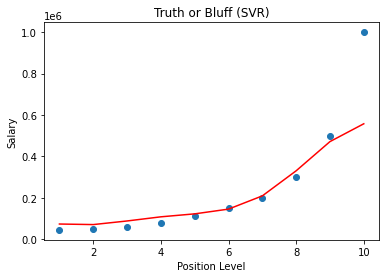

In [122]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color="red")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

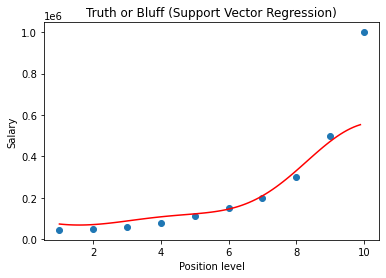

In [126]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'red')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()